## Chapter 4: [Spectroscopy](Spectroscopy.ipynb)

<hr style="height:1px;border-top:4px solid #FF8200" />

# Working with X-Sections


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


In [32]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots for example in jupyter lab
%pylab --no-import-all notebook

import pickle  # The cross sections are stored in a pickled dictionary
import os      # We need some operating system functionality

## We need to import a few important additional function from matplotlib, 
## because we want to demonstrate a few more hidden functionalities of the EELS_tools of pytTEMlib.
from matplotlib.widgets import Cursor
from matplotlib.patches import Rectangle
from matplotlib.widgets import SpanSelector

## import the configuration files of pyTEMlib (we need access to the data folder)
import pyTEMlib.config_dir
import pyTEMlib.EELS_tools as eels

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
pyTEM version:  0.6.2019.2


## Load Cross-Sections

The cross sections are part of the pyTEMlib package and are stored as a pickled dictionary in the package data directory.

Below are the lines for accessing the file.

In [2]:
data_path = os.sep.join([os.path.dirname(pyTEMlib.__file__), 'data'])
pkl_file = open(data_path+'/edges_db.pkl', 'rb')
Xsections = pickle.load(pkl_file)

or with the EELS_tools of pyTEMlib

In [3]:
Xsections = eels.get_Xsections()

## Plot Cross Sections

Please add your favourite element ot the list of atomic numbers.

<IPython.core.display.Javascript object>


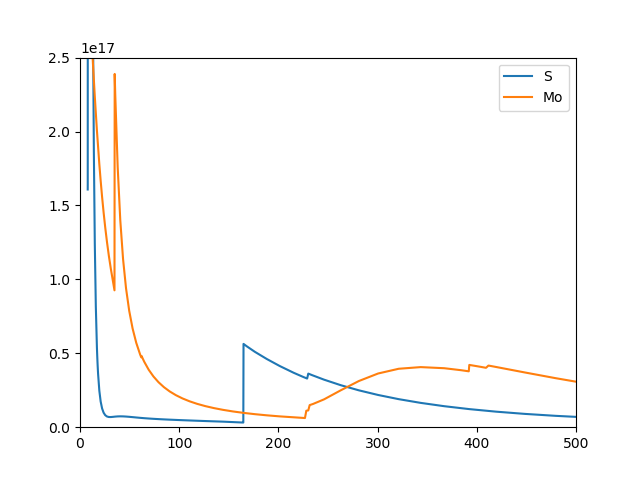

In [4]:
atomic_numbers = [16, 42]

fig, ax = plt.subplots()
for Z in atomic_numbers:
    ax.plot(Xsections[str(Z)]['ene'], Xsections[str(Z)]['dat'], label = Xsections[str(Z)]['name'])

ax.set_xlim(0,500)
ax.set_ylim(0,2.5e17)
plt.legend();

# List All Edges of an Element 

In [5]:
element = str(42)
for key in Xsections[element]:
    if isinstance(Xsections[element][key], dict):
        if 'onset' in Xsections[element][key]:
            print(f"{Xsections[element]['name']}-{key}: {Xsections[element][key]['onset']:8.1f} eV ")
            


Mo-N3:     34.8 eV 
Mo-M5:    227.0 eV 
Mo-N5:      1.8 eV 
Mo-M4:    230.3 eV 
Mo-N2:     34.8 eV 
Mo-N1:     61.8 eV 
Mo-L3:   2520.2 eV 
Mo-M1:    504.6 eV 
Mo-L2:   2625.1 eV 
Mo-L1:   2865.5 eV 
Mo-K1:  19999.5 eV 
Mo-N4:      1.8 eV 
Mo-M3:    392.3 eV 
Mo-M2:    409.7 eV 


Or ordered

In [7]:
major_edges = ['K1', 'L3', 'M5', 'N5']
all_edges = ['K1','L1','L2','L3','M1','M2','M3','M4','M5','N1', 'N2','N3','N4','N5','N6','N7','O1','O2','O3','O4','O5','O6','O7', 'P1', 'P2', 'P3']
first_close_edges = ['K1', 'L3', 'M5', 'M3', 'N5', 'N3']

element = str(42)
for key in all_edges:
    if key in Xsections[element]:
        if 'onset' in Xsections[element][key]:
            print(f"{Xsections[element]['name']}-{key}: {Xsections[element][key]['onset']:8.1f} eV ")
def list_all_edges(Z):
    element = str(Z)
    print('Major edges')
    for key in all_edges:
        if key in Xsections[element]:
            if 'onset' in Xsections[element][key]:
                print(f" {Xsections[element]['name']}-{key}: {Xsections[element][key]['onset']:8.1f} eV ")

                      
## Here with the function of the EELS_tools package                      
eels.list_all_edges(Z)

Mo-K1:  19999.5 eV 
Mo-L1:   2865.5 eV 
Mo-L2:   2625.1 eV 
Mo-L3:   2520.2 eV 
Mo-M1:    504.6 eV 
Mo-M2:    409.7 eV 
Mo-M3:    392.3 eV 
Mo-M4:    230.3 eV 
Mo-M5:    227.0 eV 
Mo-N1:     61.8 eV 
Mo-N2:     34.8 eV 
Mo-N3:     34.8 eV 
Mo-N4:      1.8 eV 
Mo-N5:      1.8 eV 
Major edges
 Mo-K1:  19999.5 eV 
 Mo-L1:   2865.5 eV 
 Mo-L2:   2625.1 eV 
 Mo-L3:   2520.2 eV 
 Mo-M1:    504.6 eV 
 Mo-M2:    409.7 eV 
 Mo-M3:    392.3 eV 
 Mo-M4:    230.3 eV 
 Mo-M5:    227.0 eV 
 Mo-N1:     61.8 eV 
 Mo-N2:     34.8 eV 
 Mo-N3:     34.8 eV 
 Mo-N4:      1.8 eV 
 Mo-N5:      1.8 eV 


# Plotting all edges of an element in view

Now, let's do it graphically

<IPython.core.display.Javascript object>


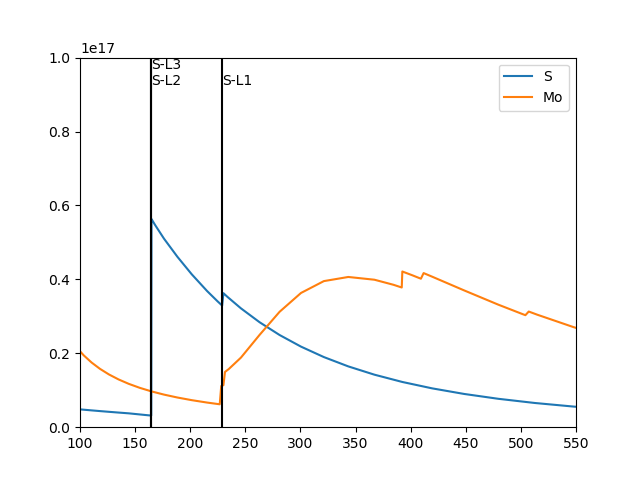

In [8]:
major_edges = ['K1', 'L3', 'M5', 'N5']
all_edges = ['K1','L1','L2','L3','M1','M2','M3','M4','M5','N1', 'N2','N3','N4','N5','N6','N7','O1','O2','O3','O4','O5','O6','O7', 'P1', 'P2', 'P3']
first_close_edges = ['K1', 'L3', 'M5', 'M3', 'N5', 'N3']

def get_Z(Z):
    """
    returns the atomic number independent of input as a string or number
    
    input:
    Z: atomic number of chemical symbol (0 if not valid)
    """
    Xsections = eels.get_Xsections()
    
    Z_out = 0
    if str(Z).isdigit(): 
        Z_out = Z
    elif isinstance(Z, str):
        for key in Xsections:
            if Xsections[key]['name'].lower() == Z.lower(): ## Well one really should know how to write elemental 
                Z_out = int(key)
    return Z_out


class elemental_edges(object):
    def __init__(self, ax, Z):
        self.ax = ax
        self.labels = None
        self.lines = None
        
        self.Z = eels.get_Z(Z)
        self.color = 'black'
        self.Xsections = eels.get_Xsections()
        self.cid = ax.figure.canvas.mpl_connect('draw_event', self.onresize)
        
        #self.update()
    def set_edge(self,Z):
        self.Z = eels.get_Z(Z)
        
            
        self.update()
    def onresize(self, event):
        self.update()
        
    def update(self):
        
        if self.labels != None:
            for label in self.labels:
                label.remove()
        if self.lines != None:
            for line in self.lines:
                line.remove()
        if self.Z>0:
            self.labels = [] ; self.lines =[] 
            x_min, x_max = self.ax.get_xlim()
            y_min, y_max = self.ax.get_ylim()
            x_bounds = ax.get_xlim()
            element = str(self.Z)
            Xsections = self.Xsections
            for key in all_edges:
                if key in Xsections[element]:
                    if 'onset' in Xsections[element][key]:
                        x = Xsections[element][key]['onset']
                        if x > x_min and x < x_max:
                            if key in first_close_edges:
                                label2 = self.ax.text(x, y_max,f"{Xsections[element]['name']}-{key}",
                                                      verticalalignment='top', rotation = 0, color = self.color)
                            else:
                                label2 = self.ax.text(x, y_max,f"\n{Xsections[element]['name']}-{key}",
                                                      verticalalignment='top', color = self.color)
                            line2 = self.ax.axvline(x,ymin = 0,ymax = 1,color=self.color)

                            self.labels.append(label2)

                            self.lines.append(line2)
                    
        
    def disconnect(self):
        if self.labels != None:
            for label in self.labels:
                label.remove()
        if self.lines != None:
            for line in self.lines:
                line.remove()
        self.labels = None
        self.lines = None
        self.ax.figure.canvas.mpl_disconnect(self.cid)
    def reconnect(self):    
        self.cid = ax.figure.canvas.mpl_connect('draw_event', self.onresize)
        ax.figure.canvas.draw_idle()
        
fig, ax_Xsec = plt.subplots()                
for Z in atomic_numbers:
    ax_Xsec.plot(Xsections[str(Z)]['ene'], Xsections[str(Z)]['dat'], label = Xsections[str(Z)]['name'])
ax_Xsec.set_xlim(100,550)
ax_Xsec.set_ylim(0,1e17)
plt.legend();   
Z = 42
edges = eels.elemental_edges(ax_Xsec, 'mO')


Let's make the lines disappear

In [9]:
edges.disconnect()

and reappear in the plot above

In [14]:
edges.set_edge(Z)

Let's set another edge

In [15]:
edges.set_edge(16)

# Find Edges Listed in Xsection Dictionary

please note that the two functions below are as ususal available in the EELS_tools of pyTEMlib

In [16]:
def find_major_edges(edge_onset, maximal_chemical_shift = 5):
    text = ''
    for element in Xsections:
        for key in Xsections[element]:
            
            #if isinstance(Xsections[element][key], dict):
            if key in major_edges:
                
                #if 'onset' in Xsections[element][key]:
                #print(key, Xsections[element][key])
                if abs(Xsections[element][key]['onset'] - edge_onset) < maximal_chemical_shift:
                    #print(element, Xsections[element]['name'], key, Xsections[element][key]['onset'])
                    text = text+ f"\n {Xsections[element]['name']:2s}-{key}: {Xsections[element][key]['onset']:8.1f} eV "
                    
    return text
def find_all_edges(edge_onset, maximal_chemical_shift = 5):
    text = ''
    for element in Xsections:
        for key in Xsections[element]:
            
            if isinstance(Xsections[element][key], dict):
            
                
                if 'onset' in Xsections[element][key]:
                
                    if abs(Xsections[element][key]['onset'] - edge_onset) < maximal_chemical_shift:
                        #print(element, Xsections[element]['name'], key, Xsections[element][key]['onset'])
                        text = text+ f"\n {Xsections[element]['name']:2s}-{key}: {Xsections[element][key]['onset']:8.1f} eV "
                    
    return text


edge_onset = 284
maximal_chemical_shift = 7
print(f'Major Edges within {maximal_chemical_shift:.1f} eV of {edge_onset:.1f}')
print(find_major_edges(edge_onset, maximal_chemical_shift))
print(f'\nAll Edges within {maximal_chemical_shift:.1f} eV of {edge_onset:.1f}')
print(find_all_edges(edge_onset, maximal_chemical_shift))

Major Edges within 7.0 eV of 284.0

 C -K1:    283.8 eV 
 Ru-M5:    279.4 eV 

All Edges within 7.0 eV of 284.0

 C -K1:    283.8 eV 
 Gd-N2:    288.5 eV 
 Ce-N1:    289.6 eV 
 Kr-M1:    288.3 eV 
 Tb-N3:    285.0 eV 
 Os-N4:    289.4 eV 
 Sr-M2:    279.8 eV 
 Eu-N2:    283.9 eV 
 Ru-M5:    279.4 eV 
 Ru-M4:    283.6 eV 


# Find Edges Depending on Cursor Postion

<IPython.core.display.Javascript object>


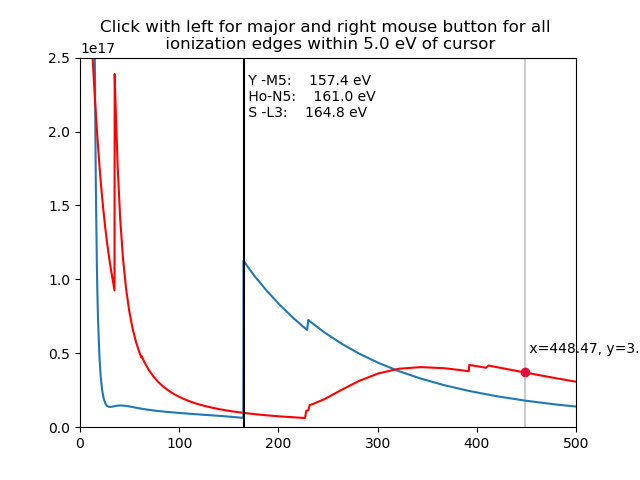

In [17]:
# We are using 
# from matplotlib.widgets import Cursor


maximal_chemical_shift = 5
fig, ax = plt.subplots()
plt.title(f'Click with left for major and right mouse button for all \n ionization edges within {maximal_chemical_shift:.1f} eV of cursor')
maximal_chemical_shift = 5
cursor = eels.EdgesatCursor(ax, Xsections['42']['ene'], Xsections['42']['dat'],maximal_chemical_shift)
cursor.maximal_chemical_shift =maximal_chemical_shift
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(Xsections['16']['ene'], Xsections['16']['dat']*2, label = 'S')
ax.plot(Xsections['42']['ene'], Xsections['42']['dat'], 'r', label = 'Mo')
ax.set_xlim(0,500)
ax.set_ylim(0,2.5e17);




# Regions select

<IPython.core.display.Javascript object>


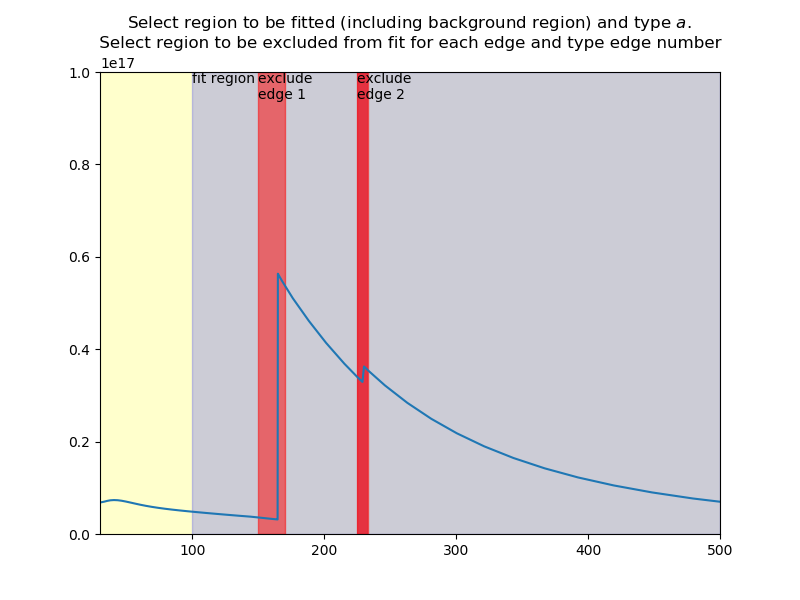

In [18]:

# We are using here 
from matplotlib.patches import Rectangle
from matplotlib.widgets import SpanSelector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='#FFFFCC')

x = Xsections['16']['ene']
y = Xsections['16']['dat']

ax.plot(x, y, '-')
ax.set_xlim(30,500 )
ax.set_ylim(0,1e17 )
ax.set_title('Select region to be fitted (including background region) and type $a$. \n Select region to be excluded from fit for each edge and type edge number \n')

regions = {}
hmin = 0
hmax = 0

    
class Region_Selector(object):
    def __init__(self, ax):
        self.ax = ax
        self.regions = {}
        self.rect = None
        self.xmin = 0
        self.xwidth = 0
         
        self.span = SpanSelector(ax, self.onselect1, 'horizontal', useblit = True,
                    rectprops=dict(alpha=0.5, facecolor='red'), span_stays=True)
        self.cid = ax.figure.canvas.mpl_connect('key_press_event', self.click)
        self.draw = ax.figure.canvas.mpl_connect('draw_event', self.onresize)
        
    def onselect1(self, xmin, xmax):
        self.xmin =  xmin
        self.width = xmax-xmin
    
    def onresize(self, event):
        self.update()
        
    def delete_region(self, key):
        if key in self.regions:
            if 'Rect' in self.regions[key]:
                self.regions[key]['Rect'].remove()
                self.regions[key]['Text'].remove()
            del(self.regions[key]) 
        
    def update(self):
        
        y_min, y_max = self.ax.get_ylim()
        for key in self.regions:
            if 'Rect' in self.regions[key]:
                self.regions[key]['Rect'].remove()
                self.regions[key]['Text'].remove()
       
            xmin = self.regions[key]['xmin']
            width = self.regions[key]['width']
            height = y_max-y_min 
            alpha = self.regions[key]['alpha']
            color = self.regions[key]['color']
            self.regions[key]['Rect'] =  Rectangle((xmin,y_min), width,height, 
                                                    edgecolor=color,alpha=alpha, facecolor=color)
            self.ax.add_patch(self.regions[key]['Rect'])

            self.regions[key]['Text'] = self.ax.text(xmin, y_max, self.regions[key]['text'],verticalalignment='top')
       
            
    def click(self, event):
        if str(event.key) in ['1','2','3','4','5','6']:
            key = str(event.key)
            text = 'exclude \nedge ' + key
            alpha = 0.5
            color = 'red'
        elif str(event.key) in ['a', 'A', 'b', 'B']:
            key = '0'
            color = 'blue'
            alpha = 0.2
            text = 'fit region'
        else:
            return
       
        if key not in self.regions:
            self.regions[key] = {}

        self.regions[key]['xmin'] = self.xmin
        self.regions[key]['width'] = self.width
        self.regions[key]['color'] = color
        self.regions[key]['alpha'] = alpha
        self.regions[key]['text'] = text
        
        self.update()
    
    
    def set_regions(self, region, start_x, width):
        if 'fit' in str(region):
            key = '0'
        if region in ['0', '1','2','3','4','5','6']:
            key = region
        if region in [0,1,2,3,4,5,6]:
            key = str(region)
             
            
        if key not in self.regions:
            self.regions[key] = {}
            if key in ['1','2','3','4','5','6']:
                self.regions[key]['text'] = 'exclude \nedge ' + key
                self.regions[key]['alpha'] = 0.5
                self.regions[key]['color'] = 'red'
            elif key == '0':
                self.regions[key]['text'] = 'fit region'
                self.regions[key]['alpha'] = 0.2
                self.regions[key]['color'] = 'blue'
            
        self.regions[key]['xmin'] = start_x
        self.regions[key]['width'] = width
            
        self.update()
            
    def get_regions(self):
        tags = {}
        for key in self.regions:
            if key == '0':
                area = 'fit_area'
            else:
                area =  key
            tags[area] = {}
            tags[area]['start_x'] = self.regions[key]['xmin']
            tags[area]['width_x'] = self.regions[key]['width']

        return tags
    
    def disconnect(self):
        del(self.span)
        self.ax.figure.canvas.mpl_disconnect(self.cid)
        #self.ax.figure.canvas.mpl_disconnect(self.draw)
        pass
        
        
regions = Region_Selector(ax)



Sometimes one wants to delete a region 

In [19]:
regions.delete_region('1')

One can get the regions with:

In [20]:
print(regions.get_regions())

{'fit_area': {'start_x': 90.0008018247543, 'width_x': 324.45161290322574}, '2': {'start_x': 224.936285695722, 'width_x': 8.338709677419388}}


We can go in and directly change the values of the regions

In [21]:
regions.regions['0']['width'] = 200.
regions.update()

But there is also a function for that

In [22]:
regions.set_regions('1',150., 20.)
regions.set_regions('fit region',100., 400.)

Disconnect region selector so that nothing is changed anymore

In [23]:
regions.disconnect()

But so that you still can access the regions selected.

In [24]:
print(regions.get_regions())

{'fit_area': {'start_x': 100.0, 'width_x': 400.0}, '2': {'start_x': 224.936285695722, 'width_x': 8.338709677419388}, '1': {'start_x': 150.0, 'width_x': 20.0}}


### With a spectrum

In [25]:
%pylab --no-import-all notebook
%gui qt

## import the configuration files of pyTEMlib (we need access to the data folder)
import pyTEMlib.EELS_tools as eels
import pyTEMlib.file_tools  as ft 


Populating the interactive namespace from numpy and matplotlib


In [27]:

h5_file = ft.h5open_file()#os.path.join(current_directory,filename))
current_channel = h5_file['Measurement_000/Channel_000']
tags = ft.h5_get_dictionary(current_channel)

current_channel['Raw_Data'][0,:] = current_channel['Raw_Data'][0,:]-current_channel['Raw_Data'][0,:].min()
current_channel['spectral_origin_x'][()] = current_channel['spectral_origin_x'][()]-30

<IPython.core.display.Javascript object>


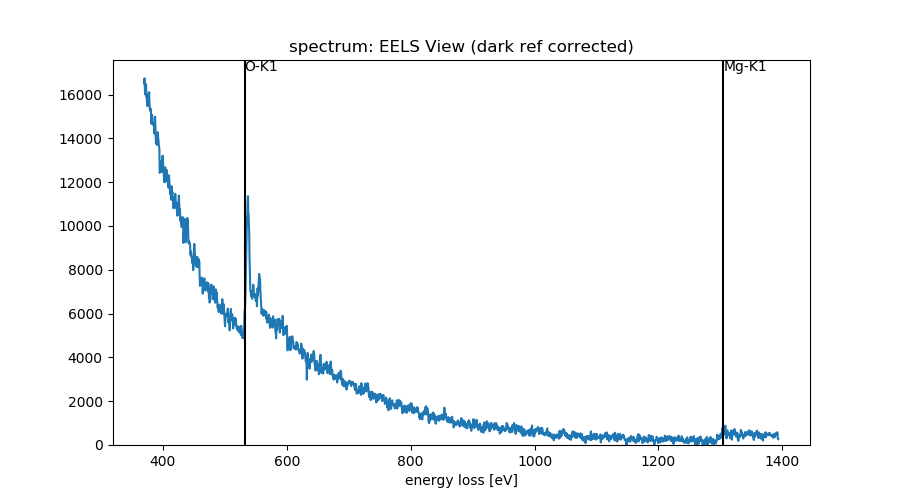

In [28]:
# Create new Figure with black background
fig = plt.figure(figsize=(9,5))

# Add a subplot with no frame
ax = plt.subplot(111)
ft.plt_pyUSID(current_channel,ax)

#ax.plot(energy_scale, data)

Add Elements and Cursor for element selection in above figure.

In [29]:
tags = ft.h5_get_dictionary(current_channel)

maximal_chemical_shift=5
cursor = eels.EdgesatCursor(ax, tags['energy_scale'], tags['data'], maximal_chemical_shift)

Mg_edges = eels.elemental_edges(ax, 'Mg')
Cu_edges = eels.elemental_edges(ax, 'Cu')
O_edges  = eels.elemental_edges(ax, 'O')

Remove edges that are not there and delete cursor.

In [30]:
Cu_edges.disconnect()
cursor.del_edges()
cursor.disconnect()
del(cursor)

## Reading Microscope dictionary parameters

In [19]:
print(pyTEMlib.config_dir.data_path)

print(os.listdir(pyTEMlib.config_dir.data_path))

import csv

with open(pyTEMlib.config_dir.config_path+'\microscopes.csv') as csv_file:
    
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    microscopes = {}
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        microscopes[str(line_count-1)] = row
        line_count += 1
    print(f'Processed {line_count} lines.')
    

print(f'There are {len(microscopes.keys())} microscopes in the set-up file')
print(microscopes['0'])


#f = open(pyTEMlib.config_dir.data_path+'\microscopes.csv')

C:\Users\gdusc\Anaconda3\lib\site-packages\pyTEMlib\data
['edges_db.csv', 'edges_db.pkl', 'fparam.txt', 'microscopes.csv', 'microscopes.xml', 'path.txt', 'TEMlibrc']
Column names are Microscope, E0, alpha, beta, pppc, correlation_factor, VOA_conv, EELS_b1, EELS_b2, EELS_b100, MADF_offset, MADF_slope, HADF_offset, HADF_slope, BF_offset, BF_slope
Processed 9 lines.
There are 8 microscopes in the set-up file
OrderedDict([('Microscope', 'Default'), ('E0', '1.00E+05'), ('alpha', '10'), ('beta', '13'), ('pppc', '1'), ('correlation_factor', '1'), ('VOA_conv', '0'), ('EELS_b1', '0'), ('EELS_b2', '0'), ('EELS_b100', '0'), ('MADF_offset', '0'), ('MADF_slope', '0'), ('HADF_offset', '0'), ('HADF_slope', '0'), ('BF_offset', '0'), ('BF_slope', '0')])


## Adding a New Microscope to Dictionary

In [20]:
#First copy default microscoe to new microscope 
microscopes['7'] = microscopes['0'].copy()

#change name
microscopes['7']['Microscope'] = 'Titan'
microscopes['7']['E0'] = 200000 # in eV
microscopes['7']['alpha'] = 30 # in mrad
microscopes['7']['beta'] = 50  # in mrad

## Updating Microscope File

In [21]:
fieldnames = microscopes['0'].keys()

with open(pyTEMlib.config_dir.config_path+'\microscopes.csv',  mode='r+') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for key in microscopes:
        writer.writerow(microscopes[key])
